
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>
<p style="text-align: center;"> *Daxi Cheng(dc43342), Jianjie Zheng(jz23373)* </p>
<br>
Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [1]:
# This part of code is only needed in Windows to get the XGBoost path
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Solution

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
# load each data set
X1 = pd.read_csv('X1.csv', header=None)
y1 = pd.read_csv('y1.csv', header=None)
X2 = pd.read_csv('X2.csv', header=None)
y2 = pd.read_csv('y2.csv', header=None)

In [5]:
# split each data set into training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

### For Data 1, (X1,y1)

(10000, 30)


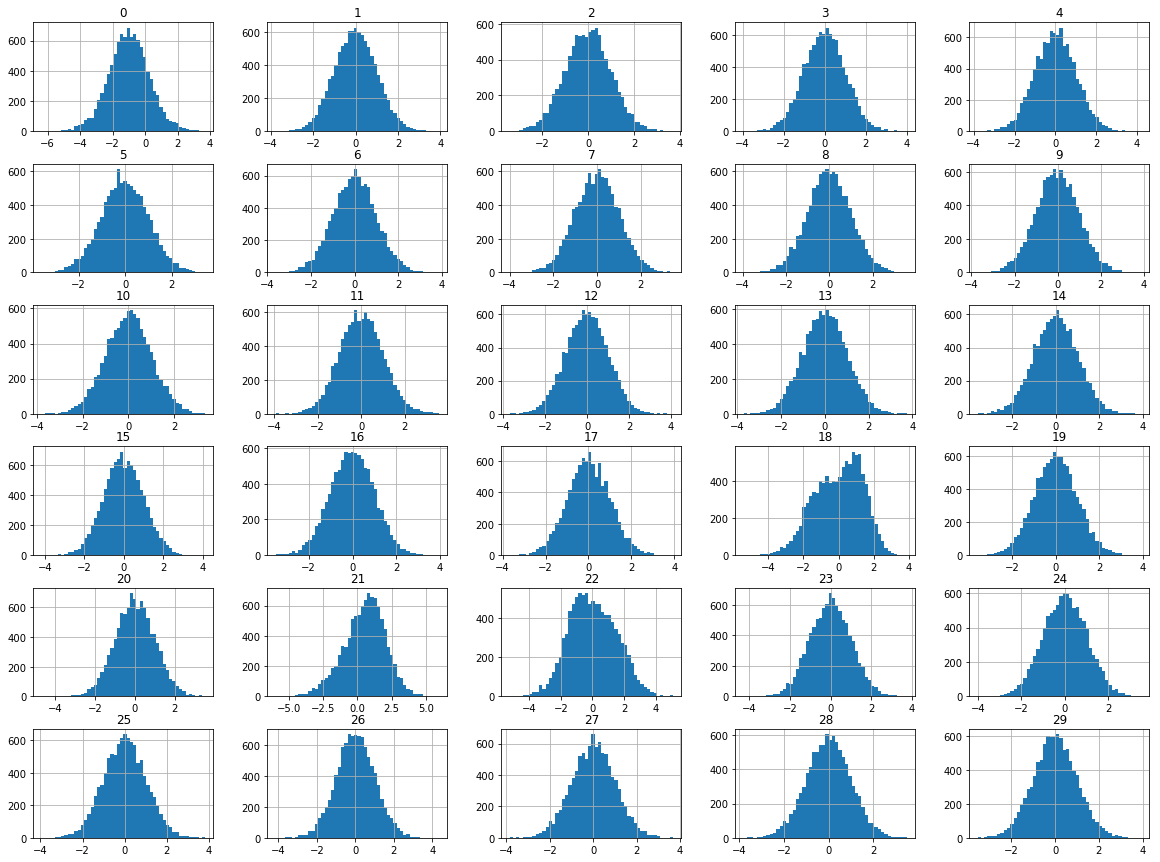

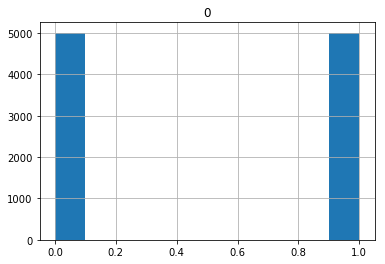

In [6]:
print X1.shape
X1.hist(bins=50, figsize=(20,15))
y1.hist()
plt.show()

In data set (X1,y1), every variable nearly perfect follows normal distribution except feature 25 is slightly different. And y value is either class 0 or class 1 and each class has similar size (5000 for class 0, 5000 for class 1). 

## Principles of parameters:

Here we use the cross validation grid search on a 3 fold training set to decide the parameters. We use the GridSearchCV function to get our result and then fit the model with best parameters combination and calculate the accuracy, error rate as well as the running time and variable importance.

## RandomForest 

In [12]:
# Random Forest using GridSearch method
# Create a classifier object with the classifier and parameter candidates
parameter_candidates = {
    'criterion': ('gini', 'entropy'),
    'max_depth': np.arange(2, 30, 5),
    'max_features': np.arange(10, 31, 10)
}
RF = RandomForestClassifier(random_state=42)
RFGS = GridSearchCV(estimator=RF, param_grid=parameter_candidates, cv=10)

# Train the classifier on data1's feature and target data
RFGS.fit(X1_train, y1_train)
print RFGS.best_params_
print RFGS.best_score_

{'max_features': 30, 'criterion': 'entropy', 'max_depth': 12}
0.909402985075


In [40]:
import time
start_time = time.time()
# using Random Forest 

RF = RandomForestClassifier(criterion='entropy',max_depth=12, random_state=42, max_features=30)
RF.fit(X1_train, y1_train)
y1_predicted_train = RF.predict(X1_train)
y1_predicted_test = RF.predict(X1_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y1_train, y1_predicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_predicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_predicted_test)
print 'The features importance is shown as following matrix:\n',RF.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y1_test,y1_predicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y1_test,y1_predicted_test)


--- time of execution is 1.97627687454 seconds ---
Training set MSE is 0.0131343283582
Testing set MSE is 0.0851515151515
The confusion matrix is:
[[1518  163]
 [ 118 1501]]
The features importance is shown as following matrix:
[ 0.07527212  0.0084246   0.00561715  0.00620218  0.00865248  0.0079661
  0.00573042  0.00942362  0.00688095  0.00539574  0.00759518  0.00759717
  0.007538    0.00788947  0.00681883  0.00737603  0.00932226  0.0059208
  0.14422427  0.00762962  0.00713519  0.11699595  0.47065456  0.00715729
  0.00598042  0.00569788  0.00900821  0.00829223  0.00931048  0.0082908 ]
accuracy rate is  0.914848484848
mean of error rate is  0.0851515151515


## Gradient Boosting Decision Tree

In [14]:
# using Gradient Boosting Decision Tree

parameter_candidates = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': np.logspace(-2, 2, 4),
    'max_depth': np.arange(2, 20, 6),
    'max_features':np.arange(2, 31, 7)
}
GBDT = GradientBoostingClassifier(random_state=42)
GBDTGS = GridSearchCV(estimator=GBDT, param_grid=parameter_candidates, cv=3,n_jobs=4)

GBDTGS.fit(X1_train, y1_train)
print GBDTGS.best_params_
print GBDTGS.best_score_

{'max_features': 30, 'loss': 'deviance', 'learning_rate': 0.21544346900318834, 'max_depth': 8}
0.918805970149


In [41]:
# final trained GBDT model
import time
start_time = time.time()
# specify parameters via map
GBDT = GradientBoostingClassifier(max_depth=8,max_features=30, learning_rate=0.22,loss='deviance',random_state=42)
GBDT.fit(X1_train, y1_train)
y1_GBDTpredicted_train = GBDT.predict(X1_train)
y1_GBDTpredicted_test = GBDT.predict(X1_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y1_train, y1_GBDTpredicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_GBDTpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_GBDTpredicted_test)
print 'The features importance is shown as following matrix:\n',GBDT.feature_importances_
print 'accuracy rate is',metrics.accuracy_score(y1_test,y1_GBDTpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y1_test,y1_GBDTpredicted_test)


--- time of execution is 8.40456390381 seconds ---
Training set MSE is 0.0
Testing set MSE is 0.0718181818182
The confusion matrix is:
[[1538  143]
 [  94 1525]]
The features importance is shown as following matrix:
[ 0.05578992  0.02353192  0.02165096  0.02314137  0.02639137  0.02187158
  0.02278527  0.02384145  0.02306344  0.01935774  0.01913693  0.02074223
  0.02167686  0.01473205  0.02233996  0.02939256  0.02568724  0.02831585
  0.09798735  0.02043748  0.03057609  0.07924616  0.15784194  0.02361271
  0.02742236  0.02461773  0.02068837  0.0237362   0.02931165  0.02107327]
accuracy rate is 0.928181818182
mean of error rate is  0.0718181818182


## XGBoost

In [24]:
# using XGBoost

parameter_candidates = {
    'objective': ('reg:linear','reg:logistic','binary:logistic','binary:logitraw'),
    'learning_rate': np.logspace(-2, 1, 4),
    'max_depth': np.arange(2, 20, 6),
    'booster':('gbtree','gblinear','dart')
}
XGB = XGBClassifier(random_state=42)
XGBGS = GridSearchCV(estimator=XGB, param_grid=parameter_candidates, cv=3,n_jobs=4)

XGBGS.fit(X1_train, y1_train)
print XGBGS.best_params_
print XGBGS.best_score_

{'objective': 'reg:logistic', 'learning_rate': 0.10000000000000001, 'max_depth': 14, 'booster': 'gbtree'}
0.91671641791


In [42]:
# final trained XGB model
import time
start_time = time.time()
# specify parameters via map
XGB = XGBClassifier(max_depth=14, learning_rate=0.1,objective = 'reg:logistic',booster='gbtree',random_state=42)
XGB.fit(X1_train, y1_train)
y1_XGBpredicted_train = XGB.predict(X1_train)
y1_XGBpredicted_test = XGB.predict(X1_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y1_train, y1_XGBpredicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_XGBpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_XGBpredicted_test)
print 'The features importance is shown as following matrix:\n',XGB.feature_importances_
print 'accuracy rate is',metrics.accuracy_score(y1_test,y1_XGBpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y1_test,y1_XGBpredicted_test)



--- time of execution is 6.97562289238 seconds ---
Training set MSE is 0.0
Testing set MSE is 0.0721212121212
The confusion matrix is:
[[1539  142]
 [  96 1523]]
The features importance is shown as following matrix:
[ 0.09191809  0.02501172  0.02329217  0.02157261  0.0268876   0.02290136
  0.02469908  0.02540253  0.02055651  0.02297952  0.02204158  0.02290136
  0.02618415  0.02055651  0.02696577  0.02430827  0.02454275  0.02305768
  0.11012975  0.02665312  0.02657496  0.10332969  0.06925121  0.0264968
  0.02149445  0.02446459  0.02696577  0.0228232   0.02462092  0.02141629]
accuracy rate is 0.927878787879
mean of error rate is  0.0721212121212


# Dataset 2, (X2,y2)

(5000, 20)


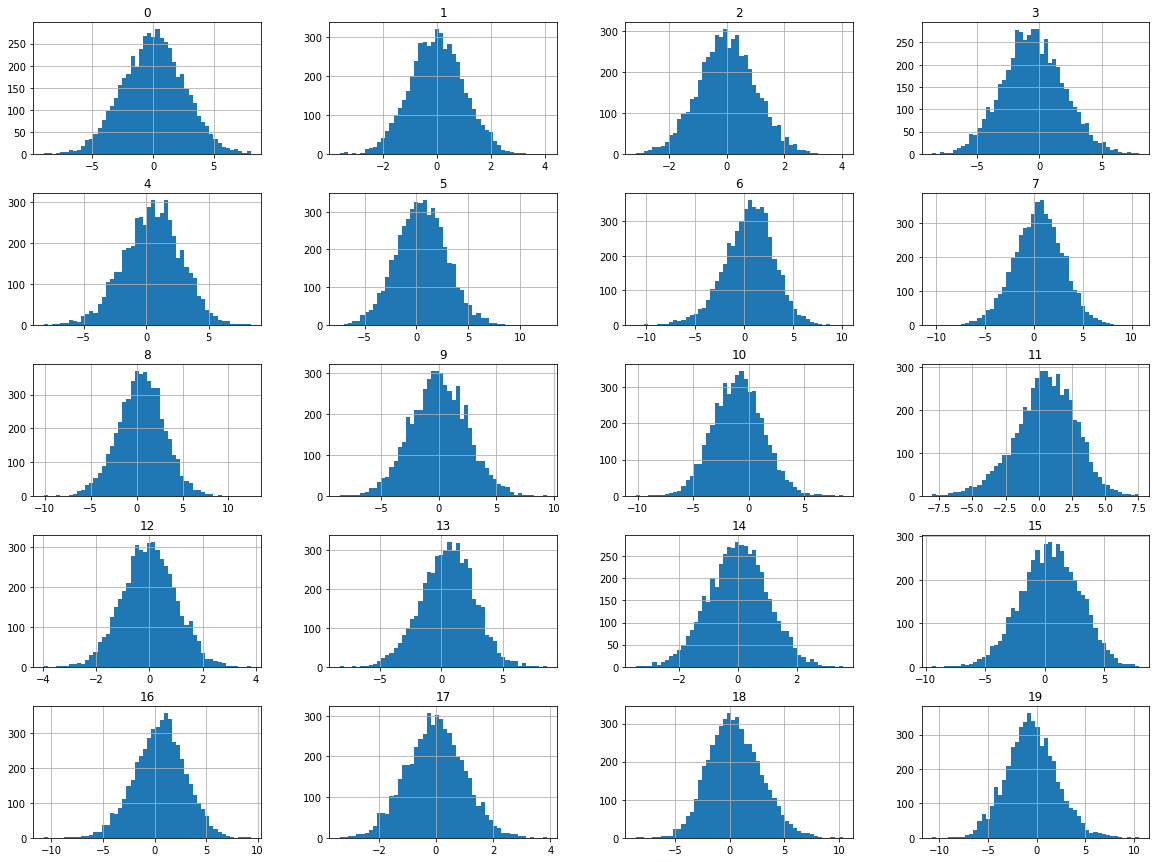

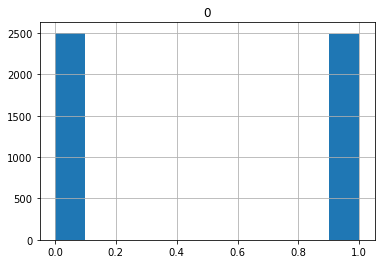

In [17]:
print X2.shape
X2.hist(bins=50, figsize=(20,15))
y2.hist()
plt.show()

dataset 1 (X1, y1) has shape of (10000, 30), dataset 2 (X2, y2) has shape of (5000, 20), so dataset 2 has half data size compare to dataset 1 and less features than dataset 1.

## Random Forest 

In [32]:
# Random Forest using GridSearch method
# Create a classifier object with the classifier and parameter candidates
parameter_candidates = {
    'criterion': ('gini', 'entropy'),
    'max_depth': np.arange(2, 19, 5),
    'max_features': np.arange(4, 20, 5)
}
RF = RandomForestClassifier(random_state=42)
RFGS = GridSearchCV(estimator=RF, param_grid=parameter_candidates, cv=10)

# Train the classifier on data1's feature and target data
RFGS.fit(X2_train, y2_train)
print RFGS.best_params_
print RFGS.best_score_

{'max_features': 14, 'criterion': 'entropy', 'max_depth': 12}
0.906268656716


In [45]:
start_time = time.time()
RF = RandomForestClassifier(criterion='entropy',max_depth=12, random_state=42, max_features=14)
RF.fit(X2_train, y2_train)
y2_predicted_train = RF.predict(X2_train)
y2_predicted_test = RF.predict(X2_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y2_train, y2_predicted_train)
print 'Testing set MSE is', mean_squared_error(y2_test, y2_predicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y2_test,y2_predicted_test)
print 'The features importance is shown as following matrix:\n',RF.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y2_test,y2_predicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y2_test,y2_predicted_test)


--- time of execution is 0.5038189888 seconds ---
Training set MSE is 0.0065671641791
Testing set MSE is 0.0933333333333
The confusion matrix is:
[[771  79]
 [ 75 725]]
The features importance is shown as following matrix:
[ 0.02328602  0.00973913  0.01134646  0.05711104  0.04710915  0.05626395
  0.03232231  0.07959673  0.04392836  0.15075781  0.03344711  0.09844041
  0.01305579  0.07915272  0.00980319  0.06761259  0.05175196  0.01122698
  0.08886529  0.035183  ]
accuracy rate is  0.906666666667
mean of error rate is  0.0933333333333


## Gradient Boosting Decision Tree

In [35]:
# using Gradient Boosting Decision Tree

parameter_candidates = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': np.logspace(-2, 2, 4),
    'max_depth': np.arange(2, 20, 6),
    'max_features':np.arange(4, 20, 5)
}
GBDT = GradientBoostingClassifier(random_state=42)
GBDTGS = GridSearchCV(estimator=GBDT, param_grid=parameter_candidates, cv=3,n_jobs=4)

GBDTGS.fit(X2_train, y2_train)
print GBDTGS.best_params_
print GBDTGS.best_score_

{'max_features': 9, 'loss': 'exponential', 'learning_rate': 0.21544346900318834, 'max_depth': 8}
0.933731343284


In [46]:
# final trained GBDT model
start_time = time.time()
# specify parameters via map
GBDT = GradientBoostingClassifier(max_depth=8,max_features=9, learning_rate=0.22,loss='exponential',random_state=42)
GBDT.fit(X2_train, y2_train)
y2_GBDTpredicted_train = GBDT.predict(X2_train)
y2_GBDTpredicted_test = GBDT.predict(X2_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y2_train, y2_GBDTpredicted_train)
print 'Testing set MSE is', mean_squared_error(y2_test, y2_GBDTpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y2_test,y2_GBDTpredicted_test)
print 'The features importance is shown as following matrix:\n',GBDT.feature_importances_
print 'accuracy rate is',metrics.accuracy_score(y2_test,y2_GBDTpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y2_test,y2_GBDTpredicted_test)


--- time of execution is 2.11904501915 seconds ---
Training set MSE is 0.0
Testing set MSE is 0.0527272727273
The confusion matrix is:
[[794  56]
 [ 31 769]]
The features importance is shown as following matrix:
[ 0.0440446   0.03399359  0.02776616  0.0561962   0.05822149  0.05329535
  0.04010322  0.05670107  0.05045104  0.08916063  0.05267134  0.06597645
  0.02078703  0.0598806   0.02236763  0.06937532  0.05424821  0.02665738
  0.07249675  0.04560595]
accuracy rate is 0.947272727273
mean of error rate is  0.0527272727273


## XGBoost

In [38]:
# using XGBoost

parameter_candidates = {
    'objective': ('reg:linear','reg:logistic','binary:logistic','binary:logitraw'),
    'learning_rate': np.logspace(-2, 1, 4),
    'max_depth': np.arange(2, 20, 6),
    'booster':('gbtree','gblinear','dart')
}
XGB = XGBClassifier(random_state=42)
XGBGS = GridSearchCV(estimator=XGB, param_grid=parameter_candidates, cv=3,n_jobs=4)

XGBGS.fit(X2_train, y2_train)
print XGBGS.best_params_
print XGBGS.best_score_

{'objective': 'reg:logistic', 'learning_rate': 0.10000000000000001, 'max_depth': 14, 'booster': 'gbtree'}
0.925970149254


In [42]:
# final trained XGB model
start_time = time.time()
# specify parameters via map
XGB2 = XGBClassifier(max_depth=14, learning_rate=0.1,objective = 'reg:logistic',booster='gbtree',random_state=42)
XGB2.fit(X2_train, y2_train)
y2_XGBpredicted_train = XGB2.predict(X2_train)
y2_XGBpredicted_test = XGB2.predict(X2_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))
print 'Training set MSE is', mean_squared_error(y2_train, y2_XGBpredicted_train)
print 'Testing set MSE is', mean_squared_error(y2_test, y2_XGBpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y2_test,y2_XGBpredicted_test)
print 'The features importance is shown as following matrix:\n',XGB2.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y2_test,y2_XGBpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y2_test,y2_XGBpredicted_test)


--- time of execution is 2.03572487831 seconds ---
Training set MSE is 0.0
Testing set MSE is 0.0563636363636
The confusion matrix is:
[[791  59]
 [ 34 766]]
The features importance is shown as following matrix:
[ 0.05320132  0.02217822  0.02178218  0.06653465  0.06046205  0.06930693
  0.04858086  0.06033003  0.0529373   0.05834984  0.06059406  0.06666667
  0.0209901   0.06719472  0.01531353  0.06719472  0.06178218  0.01834984
  0.0620462   0.04620462]
accuracy rate is  0.943636363636
mean of error rate is  0.0563636363636


## Conclusion

For dataset 1:

|Model|Error rate|Time|
|--- | --- | ---|
|Random Forest|0.0851|1.98 seconds|
|GBDT|0.0718|8.40 seconds|
|XGBoost|0.0721|6.98 seconds|

For dataset 2:

|Model|Error rate|Time|
|--- | --- | ---|
|Random Forest|0.09333|0.50 seconds|
|GBDT|0.0527|2.12 seconds|
|XGBoost|0.0563|2.01 seconds|


Here we got the results as above.<br>
For these two datasets, all features seems to be generated with normal distributions and they are about the same scale of importance. In consequence, the random forest would not be able to have a vary good result. Since XGBoost is a parallel modification of GBDT, it should run faster than GBDT.

For dataset 1, the accuracy of three models are RF < XGBoost < GBDT, and the time of building these models are GBDT > XGBoost >> RF, (by >> I mean much larger than). We can see that GBDT actually performs really well at a high computation time cost, XGBoost can achieve about the same level of accuracy with less time.

For dataset 2, the accuracy of three models are RF < XGBoost < GBDT , and the time of building these models are GBDT > XGBoost > RF, . In this case, XGBoost save only a little bit of time.

Also, since the features are generated in a quite normal distribution way, and they are about equally important in some extend, our model parameters of max_features in random forest are relatively higher than the rule of thumb criteria of square root of the total feature number.

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

## Solution

In [48]:
import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool, PanTool
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ZoomInTool, ZoomOutTool
from bokeh.models import Legend
from bokeh.transform import factor_cmap
from bokeh.palettes import magma
# from bokeh.models import Select
# from bokeh.models.widgets import Toggle, Tabs
# from bokeh.layouts import row

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

In [49]:
PSG = data["PSG"]
Age = data['Age']
y = data["logsalary"]
team = data['Tm']
salary = data['SALARY']
positions = data['Pos']
players = data['Player']

source = ColumnDataSource(data=dict(
    PSG=PSG,
    Age=Age,
    y=y,
    team=team,
    salary=salary,
    positions=positions,
    players=players))

In [52]:
output_notebook()
def add_plot(x_axis):
    #first we define the hover
    hover = HoverTool(tooltips=[("Player", "@players"), ("Team", "@team"), (
        "Position", "@positions"), ("Salary", "@salary"), (
            x_axis, '$x')])

    p = figure(
        plot_height=600,
        plot_width=800,
        tools=[hover, BoxZoomTool()],
        title='PSG and Age vs LogSalary in NBA')

    p.scatter(
        x=jitter(x_axis, width=0.1, range=p.x_range)
        if x_axis == 'Age' else x_axis,
        y='y',
        source=source,
        size=12,
        legend="positions",
        color=factor_cmap('positions', palette= magma(7),factors=positions))
    p.add_tools(PanTool(), ZoomInTool(), ZoomOutTool())

    p.xaxis.axis_label = x_axis
    p.yaxis.axis_label = 'Log Salary'
    p.legend.orientation = "vertical"
    p.legend.location = "bottom_right"

    return p


plot = Tabs(tabs=[
    Panel(child=add_plot('PSG'), title="PSG"),
    Panel(child=add_plot('Age'), title='Age')
])

show(plot)

Loading BokehJS ...

Result of PSG


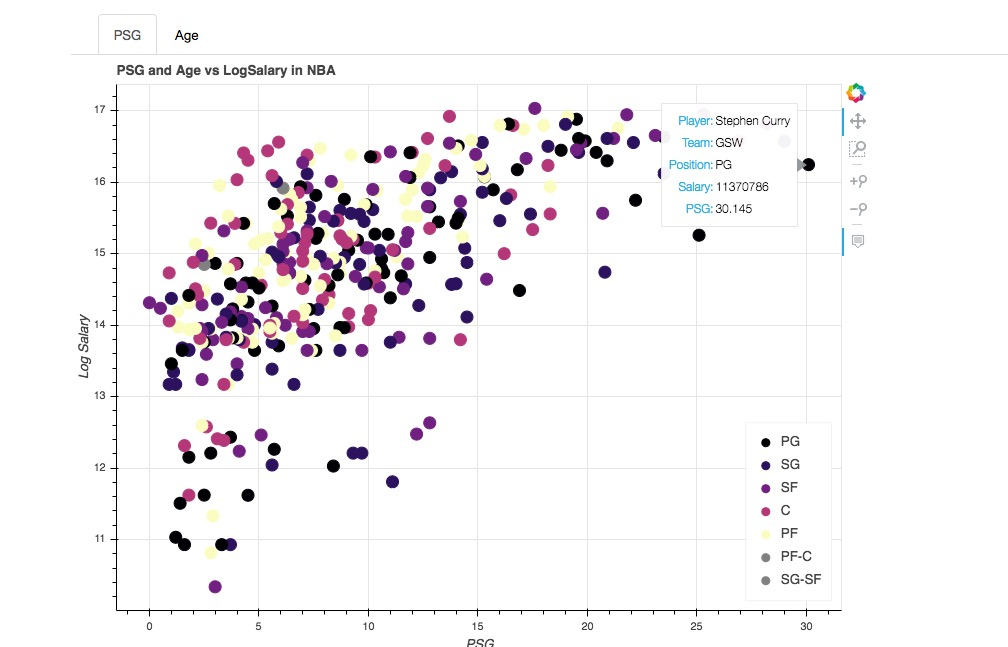

In [53]:
from IPython.display import Image
print 'Result of PSG'
Image(filename='p1.png',width=800,height=1000)

Result of Age


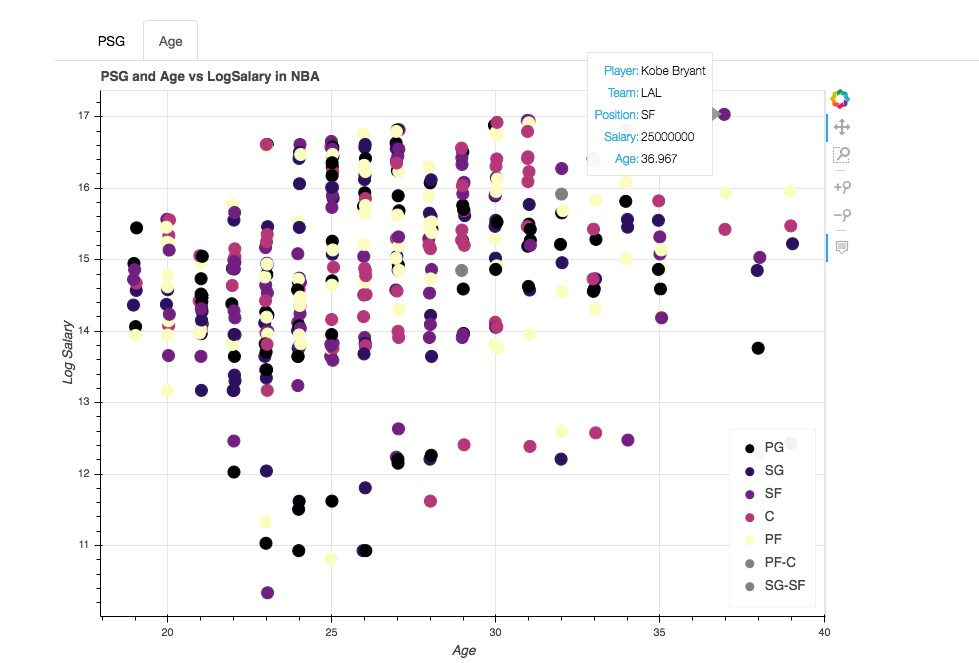

In [54]:
print 'Result of Age'
Image(filename='p2.png',width=800,height=1000)

** Note: **I pointed the cursor at two great players to display the hover effect.

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [55]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('diabetes_train-log.csv')
data_test = pd.read_csv('diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

### A

In [56]:
from sklearn.metrics import fbeta_score, make_scorer
def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth, prediction)
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / len(ground_truth)
my_scorer = make_scorer(per_class_accuracy, greater_is_better=True)

In [65]:
LinearSVC = SVC(kernel='linear')
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100,1000]}
LinearSVCGS = GridSearchCV(
    LinearSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
    )

LinearSVCGS.fit(xtrain, ytrain)
print 'Best C is ',LinearSVCGS.best_params_
print 'Best score is',LinearSVCGS.best_score_

Best C is  {'C': 1000}
Best score is 0.72


In [66]:
LinearSVC=SVC(C=1000, kernel='linear')
LinearSVC.fit(xtrain, ytrain)
ypredictedL = LinearSVC.predict(xtest)
conf_matL = confusion_matrix(ytest, ypredictedL)
conf_matL

array([[218,  27],
       [ 45,  67]])

In [67]:
LinearSVCGS.grid_scores_

[mean: 0.61750, std: 0.01473, params: {'C': 0.01},
 mean: 0.69500, std: 0.06780, params: {'C': 0.1},
 mean: 0.71750, std: 0.05039, params: {'C': 1},
 mean: 0.71500, std: 0.04872, params: {'C': 10},
 mean: 0.71750, std: 0.04376, params: {'C': 100},
 mean: 0.72000, std: 0.04825, params: {'C': 1000}]

We can see here that the best parameter of C is 1000 here.

In [59]:
def get_accuracy(cm):
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / (cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])

In [60]:
print 'With linear kernel, the rest set accuracy is',get_accuracy(conf_matL)

With linear kernel, the rest set accuracy is 0.798319327731


### B

In [68]:
GaussianSVC = SVC(kernel='rbf')
GaussianSVCGS = GridSearchCV(
    GaussianSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
    )

GaussianSVCGS.fit(xtrain, ytrain)
print 'Best C is ',GaussianSVCGS.best_params_
print 'Best score is',GaussianSVCGS.best_score_

Best C is  {'C': 10}
Best score is 0.69


In [69]:
GaussianSVC=SVC(C=10, kernel='rbf')
GaussianSVC.fit(xtrain, ytrain)
ypredictedL = GaussianSVC.predict(xtest)
conf_matL1 = confusion_matrix(ytest, ypredictedL)
conf_matL1

array([[205,  40],
       [ 41,  71]])

In [70]:
print 'With gaussian kernel, the rest set accuracy is',get_accuracy(conf_matL1)

With gaussian kernel, the rest set accuracy is 0.773109243697


In [71]:
GaussianSVCGS.grid_scores_

[mean: 0.61500, std: 0.00557, params: {'C': 0.01},
 mean: 0.61500, std: 0.00557, params: {'C': 0.1},
 mean: 0.68500, std: 0.03820, params: {'C': 1},
 mean: 0.69000, std: 0.02717, params: {'C': 10},
 mean: 0.65750, std: 0.05644, params: {'C': 100},
 mean: 0.65250, std: 0.07247, params: {'C': 1000}]

We can see here that the best parameter of C is 10 here.

### C

In this case, we found out that linear kernel actually perform better than the Gaussian kernel(79% vs 77%). This is probably because that this case is quite linear separable in the raw space instead of the more 'curvy' boundary of Gaussian kernel easily get, so the linear kernel have its advantage that with limited training data, it can figure out the linear boundary.